In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
# Re-loading the data from the provided file
data_recheck = pd.read_excel('Classification_collection.xlsx', sheet_name='A')# chance to ('Skin',')


In [81]:
test= pd.read_excel('Classification_collection.xlsx', sheet_name='T')

In [57]:
# df = data_recheck
# t= df.iloc[:,615:715]
# dp = df.iloc[:,515:615]
# target = df.iloc[:,0]

In [56]:
# # Initialize an empty dataframe for the result
# result = pd.DataFrame()

# # Get the list of columns from df1 and df2
# columns1 = t.columns
# columns2 = dp.columns

# # Iterate over the columns and combine them alternately
# for col1, col2 in zip(columns1, columns2):
#     result[col1] = t[col1]
#     result[col2] = dp[col2]

In [55]:
# result.head()
# # Add the target column
# result['target'] = df.iloc[:,0]

In [54]:
# result
# result.to_excel('organised_data_1.xlsx', index=False)

In [53]:
# # Get df values
# X = result.values
# X[X==0] = 1e-5

# X_train_base, X_t_base = train_test_split(X, test_size=0.2, random_state=100, shuffle=True)
# X_test_base, X_val_base = train_test_split(X_t_base, test_size=0.05, random_state=50, shuffle=True)


# scaler_in = StandardScaler()
# scaler_out = StandardScaler()

# train_in = scaler_in.fit_transform((X_train_base[:,:200].astype(float)))
# train_out = (X_train_base[:, -1].astype(int)) -1

# test_in = scaler_in.fit_transform((X_test_base[:,:200].astype(float)))
# test_out = (X_test_base[:, -1].astype(int)) -1

# val_in = scaler_in.fit_transform((X_val_base[:,:200].astype(float)))
# val_out = (X_val_base[:, -1].astype(int)) -1

# # 1D
# train_sets1 = [train_in, train_out] # can add the lebel to the array ",train_label"
# test_sets1  = [test_in, test_out]
# val_sets1  = [val_in, val_out]

In [101]:
# Get df values
X = data_recheck.values
X[X==0] = 1e-5



X_train_base, X_test_base = train_test_split(X, test_size=0.2, random_state=100, shuffle=True)
X_train_base, X_val_base = train_test_split(X_train_base, test_size=0.05, random_state=50, shuffle=True)

# Normalization
# Standardize the training input data
scaler_t = StandardScaler()
scaler_p = StandardScaler()
scaler_dp = StandardScaler()

# Create and normalize train datasets for 1D
list = [0] # Labels index
num_time_steps = 100
norm_log_t_train = scaler_t.fit_transform((X_train_base[:,315:415].astype(float)))
norm_log_p_train = scaler_p.fit_transform((X_train_base[:,415:515].astype(float)))
norm_log_dp_train = scaler_dp.fit_transform((X_train_base[:,515:615].astype(float))) # only this column was required 
norm_target_train = (X_train_base[:, list].astype(int))

# Discard time, normalize logP, logdP for 2D
X_train = np.stack([norm_log_p_train,   norm_log_dp_train], axis=2)  # Stacking 'dp' and 'derp'
X_train_reshaped = X_train.reshape(-1, num_time_steps, 2)
train_label = norm_target_train -1

X_train_1 =  norm_log_dp_train# np.hstack([ norm_log_t_train, norm_log_dp_train])#norm_log_p_train, norm_log_t_train,
#X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
train_label = norm_target_train -1

# Create and normalize test datasets 1D
norm_t_test = scaler_t.transform((X_test_base[:,315:415].astype(float)))
norm_log_p_test = scaler_p.transform((X_test_base[:,415:515].astype(float)))
norm_log_dp_test = scaler_dp.transform((X_test_base[:,515:615].astype(float)))
norm_target_test = (X_test_base[:, list].astype(int))

# Discard time, normalize logP, logdP 2D
X_test = np.stack([norm_log_p_test,  norm_log_dp_test], axis=2)  # Stacking 'dp' and 'derp'
X_test_reshaped = X_test.reshape(-1, num_time_steps, 2)
test_label = norm_target_test 

X_test_1 = norm_log_dp_test# np.hstack([ norm_t_test, norm_log_dp_test])#norm_log_p_test, norm_t_test,
#X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))
test_label = norm_target_test -1

# Create and normalize Val datasets
norm_t_val = scaler_t.transform((X_val_base[:,315:415].astype(float)))
norm_log_p_val = scaler_p.transform((X_val_base[:,415:515].astype(float)))
norm_log_dp_val = scaler_dp.transform((X_val_base[:,515:615].astype(float)))
norm_target_val = (X_val_base[:, list].astype(int))

# Discard time, normalize logP, logdP
X_val =  np.stack([norm_log_p_val,  norm_log_dp_val], axis=2)  # Stacking 'dp' and 'derp'
# X_val_reshaped = X_val.reshape(-1, num_time_steps, 2)
val_label = norm_target_val

X_val_1 = norm_log_dp_val#  np.hstack([norm_t_val,  norm_log_dp_val])#norm_log_p_val,
#X_val_1 =  X_val_1.reshape((X_val_1.shape[0], X_val_1.shape[1], 1))
val_label = norm_target_val -1



# 1D
train_sets1 = [X_train_1, train_label] # can add the lebel to the array ",train_label"
test_sets1  = [X_test_1, test_label]
val_sets1  = [X_val_1, val_label]


# 2D
train_sets2 = [X_train, train_label] # can add the lebel to the array ",train_label"
test_sets2  = [X_test, test_label]
val_sets2  = [X_val, val_label]

In [45]:
def calculate_statistics(data, label):
    statistics = {
        'mean': np.mean(data, axis=0),
        'std': np.std(data, axis=0),
        'min': np.min(data, axis=0),
        'max': np.max(data, axis=0)
    }
    stats_df = pd.DataFrame(statistics)
    stats_df.index = [f'{label}_{i}' for i in range(data.shape[1])]
    return stats_df

# Train set statistics
#train_in_stats = calculate_statistics(X_train, 'train_in')
train_out_stats = calculate_statistics(train_label, 'train_out')

# Test set statistics
#test_in_stats = calculate_statistics(X_test, 'test_in')
test_out_stats = calculate_statistics(test_label, 'test_out')

# Validation set statistics
#val_in_stats = calculate_statistics(X_val, 'val_in')
val_out_stats = calculate_statistics(val_label, 'val_out')

# Print the statistics
#print("Train Input Statistics:\n", train_in_stats, "\n")
print("Train Output Statistics:\n", train_out_stats, "\n")
#print("Test Input Statistics:\n", test_in_stats, "\n")
print("Test Output Statistics:\n", test_out_stats, "\n")
#print("Validation Input Statistics:\n", val_in_stats, "\n")
print("Validation Output Statistics:\n", val_out_stats, "\n")

Train Output Statistics:
                 mean       std  min  max
train_out_0  1.55696  1.180496    0    3 

Test Output Statistics:
              mean       std  min  max
test_out_0  1.575  1.165697    0    3 

Validation Output Statistics:
                mean       std  min  max
val_out_0  1.638158  1.164437    0    3 



In [48]:
def class_distribution(data, label_name):
    unique, counts = np.unique(data, return_counts=True)
    distribution = dict(zip(unique, counts))
    dist_df = pd.DataFrame.from_dict(distribution, orient='index', columns=['count'])
    dist_df.reset_index(inplace=True)
    dist_df.rename(columns={'index': f'{label_name}_class'}, inplace=True)
    return dist_df

# Assuming you have these arrays
train_label = train_label
test_label = test_label
val_label = val_label

# Calculate class distributions
train_class_dist = class_distribution(train_label, 'train')
test_class_dist = class_distribution(test_label, 'test')
val_class_dist = class_distribution(val_label, 'val')

# Print class distributions
print("Train Class Distribution:\n", train_class_dist, "\n")
print("Test Class Distribution:\n", test_class_dist, "\n")
print("Validation Class Distribution:\n", val_class_dist, "\n")

Train Class Distribution:
    train_class  count
0            0   1666
1            1    873
2            2   1591
3            3   1646 

Test Class Distribution:
    test_class  count
0           0    419
1           1    236
2           2    437
3           3    428 

Validation Class Distribution:
    val_class  count
0          0     77
1          1     50
2          2     83
3          3     94 



In [102]:
# Add and normalize field data
# Get df values
X = test.values
#X[X==0] = 1e-5

# Log transformation and normalization for test data using the trained scaler
norm_log_t_field = scaler_t.transform((X[:,315:415].astype(float)))
norm_log_p_field = scaler_p.transform((X[:,415:515].astype(float)))
norm_log_dp_field = scaler_dp.transform((X[:,515:615].astype(float))) 
norm_target_field = (X[:, list].astype(int))

# Discard time, normalize logP, logdP
X_field =  np.stack([norm_log_p_field,  norm_log_dp_field], axis=2)  # Stacking 'dp' and 'derp'
# X_field_reshaped = X_field.reshape(-1, num_time_steps, 2)
val_field = norm_target_field

X_field_1 = norm_log_dp_field#  np.hstack([norm_log_t_field,  norm_log_dp_field])#norm_log_p_val,
#X_field_1 =  X_field_1.reshape((X_field_1.shape[0], X_field_1.shape[1], 1))
field_label = norm_target_field -1
field_sets1  = [X_field_1, field_label]

In [60]:
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor , XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

In [92]:
# Step 4: Choose and initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=1000, random_state=100, bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None , min_samples_leaf=1,
 min_samples_split=4, min_weight_fraction_leaf=0.0
 , n_jobs=1, oob_score=False,
 verbose=0, warm_start=False)

In [69]:
# Initializing the XGBoost Classifier with initial parameters
model = XGBClassifier(
    learning_rate=0.01,      # Step size shrinkage used to prevent overfitting. Range is [0,1]
    n_estimators=1000,       # Number of trees to fit.
    max_depth=3,            # Maximum tree depth for base learners.
)

In [93]:
model.fit(train_sets1[0], train_sets1[1])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3712\2572109960.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_sets1[0], train_sets1[1])
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=4,
                       n_estimators=1000, n_jobs=1, random_state=100)

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(test_sets1[0])

# Accuracy
accuracy = accuracy_score(test_sets1[1], y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(test_sets1[1], y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 99.93%
Confusion Matrix:
 [[419   0   0   0]
 [  0 236   0   0]
 [  1   0 436   0]
 [  0   0   0 428]]


In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(field_sets1[0])

# Accuracy
accuracy = accuracy_score(field_sets1[1], y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(field_sets1[1], y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 91.46%
Confusion Matrix:
 [[40  0  0  0]
 [ 0 40  0  0]
 [ 0  0 40  0]
 [ 0  0 14 30]]


In [96]:
# Step 5: Evaluate the model
y_pred_train = model.predict(train_sets1[0])
y_pred_test = model.predict(field_sets1[0])

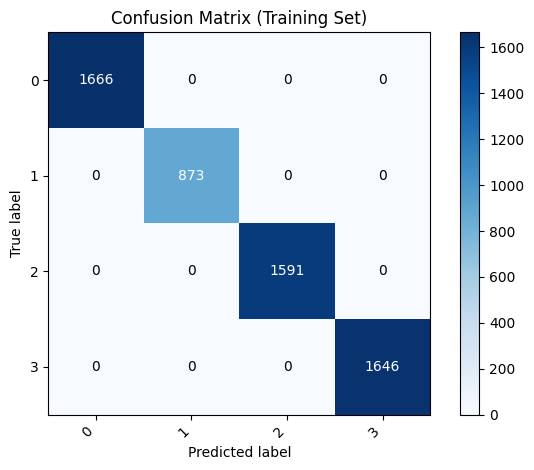

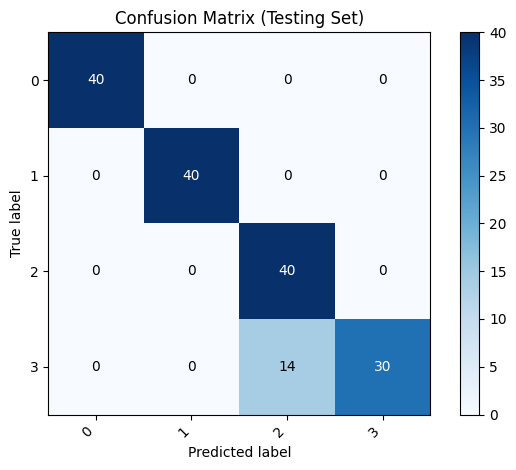

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1666
           1       1.00      1.00      1.00       873
           2       1.00      1.00      1.00      1591
           3       1.00      1.00      1.00      1646

    accuracy                           1.00      5776
   macro avg       1.00      1.00      1.00      5776
weighted avg       1.00      1.00      1.00      5776

Classification Report (Testing Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       0.74      1.00      0.85        40
           3       1.00      0.68      0.81        44

    accuracy                           0.91       164
   macro avg       0.94      0.92      0.92       164
weighted avg       0.94      0.91      0.91       164



In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Step 6: Generate evaluation plots and matrices
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize confusion matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.xticks(rotation=45, ha='right')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Plot confusion matrix for the training set
plot_confusion_matrix(train_sets1[1], y_pred_train, classes=np.unique(train_sets1[1]), normalize=False, title='Confusion Matrix (Training Set)')
plt.show()

# Plot confusion matrix for the testing set
plot_confusion_matrix(field_sets1[1], y_pred_test, classes=np.unique(field_sets1[1]), normalize=False, title='Confusion Matrix (Testing Set)')
plt.show()

# Print classification report for the training set
print("Classification Report (Training Set):\n", classification_report(train_sets1[1], y_pred_train))

# Print classification report for the testing set
print("Classification Report (Testing Set):\n", classification_report(field_sets1[1], y_pred_test))

In [33]:
from xgboost import XGBClassifier

# Create an XGBoost classifier model
model = XGBClassifier(n_estimators=200, max_depth=8, reg_lambda=0.80,
                      learning_rate=0.1, gamma=0, random_state=10)

In [35]:
# Fit the model to the training data (assuming X_train and y_train are defined)
model.fit(train_sets1[0], train_sets1[1])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
# Predict using the model
y_pred = model.predict(test_sets1[0])
y_pred1 = model.predict(train_sets1[0])

In [75]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(test_sets1[1], y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9993421052631579


In [76]:
# Print classification report
print(classification_report(test_sets1[1], y_pred))
print(classification_report(train_sets1[1], y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       437
           3       1.00      1.00      1.00       428

    accuracy                           1.00      1520
   macro avg       1.00      1.00      1.00      1520
weighted avg       1.00      1.00      1.00      1520

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1666
           1       1.00      1.00      1.00       873
           2       1.00      1.00      1.00      1591
           3       1.00      1.00      1.00      1646

    accuracy                           1.00      5776
   macro avg       1.00      1.00      1.00      5776
weighted avg       1.00      1.00      1.00      5776

